# Token counts within contigs analysis

## Read bed files

In [4]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files')

bedDfList = []
for bedFile in os.listdir(bedDir):
    bedDfList.append(pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score']))

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score
0,1,0,6,ATATTTG,0.006514
1,1,7,12,ATTTAT,-0.001371
2,1,13,19,CTTTTTT,0.001677
3,1,20,24,CATAA,-0.009932
4,1,25,31,TTCTTCT,-0.006813
...,...,...,...,...,...
537799,26,113,115,CGT,-0.026195
537800,26,116,123,TTAACTTT,0.016284
537801,26,124,131,TGTTGTTG,0.020886
537802,26,132,136,ACCAT,-0.021129


## Calculate contig counts

In [5]:
contigCountsDf = bedDf[['contig_id']].value_counts().reset_index().sort_values(by='contig_id')
contigCountsDf

,contig_id,count
9,1,14632
14,2,14481
13,3,14586
5,4,14667
12,5,14606
...,...,...
115,115,24
116,116,23
114,117,25
117,118,23


## Plot

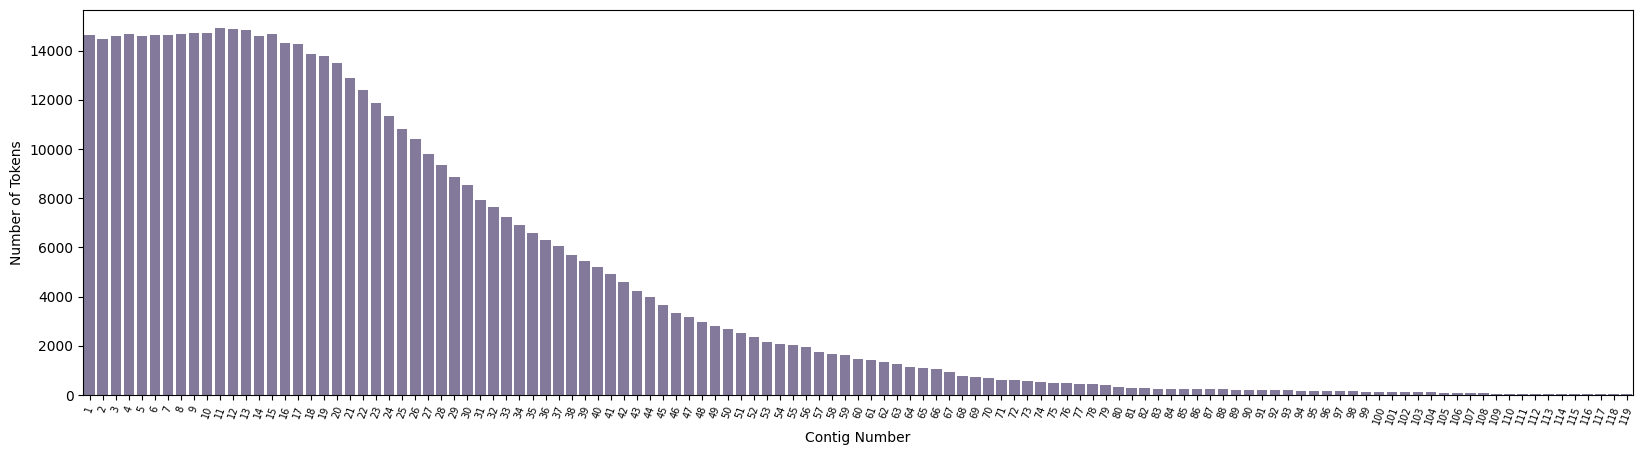

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))

ax = sns.barplot(contigCountsDf, x="contig_id", y="count", color='#8174A0')

plt.xlabel('Contig Number')
plt.xticks(fontsize=7, rotation=70)
plt.ylabel('Number of Tokens')

plt.show()